# Исследование данных о поездках на самокатах

## Содержание

1. Описание исследования

    1.1. Описание данных

    1.2. Цель исследования

    1.3. Ход исследования
    
2. Предобработка данных

3. Исследовательский анализ

4. Проверка гипотез

5. Работа с распределениями

6. Выводы

7. Рекомендации заказчику

## 1. Описание исследования

Переданы данные о пользователях сервиса аренды самокатов из разных городов и их поездках. В ходе исследования предстоит определить результаты выручки существующего бизнеса, а также проверить гипотезы, которые помогут бизнесу расшириться. Предоставлена информация о типе подписок сервиса:

**без подписки**

абонентская плата отсутствует;

стоимость одной минуты поездки — 8 рублей;

стоимость старта (начала поездки) — 50 рублей;

**с подпиской Ultra**

абонентская плата — 199 рублей в месяц;

стоимость одной минуты поездки — 6 рублей;

стоимость старта — бесплатно.

### 1.1. Описание данных

**Данные о пользователях:**

user_id -	уникальный идентификатор пользователя

name -	имя пользователя

age -	возраст

city -	город

subscription_type -	тип подписки (free, ultra)

**Данные о поездках:**

user_id - уникальный идентификатор пользователя

distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)

duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» 
до момента, как он нажал кнопку «Завершить поездку»

date - дата совершения поездки

**Данные о подписках:**

subscription_type - тип подписки

minute_price - стоимость одной минуты поездки по данной подписке

start_ride_price - стоимость начала поездки

subscription_fee - стоимость ежемесячного платежа

### 1.2. Цель исследования

Цель исследования заключается в проверке гипотез, которые помогут разработать стратегию для увеличения количества пользователей сервиса по аренде самокатов.

### 1.3. Ход исследования


Шаг 1. Изучение общей информации

Шаг 2. Предобработка данных

Шаг 3. Исследовательский анализ

Шаг 4. Объединение данных

Шаг 5. Подсчёт выручки

Шаг 6. Проверка гипотез

Шаг 7. Работа с распределениями

In [1]:
#  импорт библиотек
import pandas as pd
import numpy as np
from math import factorial, sqrt
from scipy import stats as st

from matplotlib import pyplot as plt

#### Шаг 1. Загрузка данных

In [2]:
# получение данных о пользователях
users = pd.read_csv('/datasets/users_go.csv')

In [3]:
# получение данных о поездках
rides = pd.read_csv('/datasets/rides_go.csv')

In [4]:
# получение данных о подписках
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [5]:
# функция для проверки наборов данных
def check_df (df):

    # общая информация 
    display(df.info())

    # первые 10 строк
    display(df.head(10))

    # проверка на дубликаты
    print('Полных дубликатов в наборе данных:', df.duplicated().sum())
    
    # проверка на пропуски
    print('Пропусков по столбцам:\n', df.isna().sum())

In [6]:
# проверим набор данных о пользователях
check_df(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


Полных дубликатов в наборе данных: 31
Пропусков по столбцам:
 user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


In [7]:
# проверим набор данных о поездках
check_df(rides)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


Полных дубликатов в наборе данных: 0
Пропусков по столбцам:
 user_id     0
distance    0
duration    0
date        0
dtype: int64


In [8]:
# проверим набор данных о подписках
check_df(subscriptions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Полных дубликатов в наборе данных: 0
Пропусков по столбцам:
 subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Краткий вывод:

В наборе данных о поездках изменить тип данных столбца с информацией о дате поездки. Для дальнейшего анализа сезонности создать новый столбец с информацией о месяце а наборе данных о поездках. В наборах данных о пользователях и поездках необходимо проверить наличие пропусков и дубликатов.

## 2. Предобработка данных

#### Шаг 2. Предобработка данных

**Изменение типов и добавление столбцов**

In [9]:
# изменение типа данных в столбце с информацией о дате поездки
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

# проверка изменений
print(rides['date'][0], type(rides['date'][0]))

2021-01-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [10]:
# добавление столбца для анализа сезонности
rides['month'] = rides['date'].dt.month

#проверка изменений
rides.head(2)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1


In [11]:
# проверка актуальности данных
print('Минимальная дата в наборе данных о поездках:', rides['date'].min())
print('Максимальная дата в наборе данных о поездках:', rides['date'].max())

Минимальная дата в наборе данных о поездках: 2021-01-01 00:00:00
Максимальная дата в наборе данных о поездках: 2021-12-30 00:00:00


*В наборе данных о поездках представлены данные за 2021 год, следовательно исследование и его результаты будут актуальны для 2022 года.*

**Удаление дубликатов**

In [12]:
# проверка наличия полных дубликатов в данных о пользователях
users.duplicated().sum()

31

In [13]:
# удаление дубликатов в данных о пользователях
users = users.drop_duplicates().reset_index(drop=True)

In [14]:
# проверка наличия полных дубликатов в данных о поездках
rides.duplicated().sum()

0

**Обработка пропусков**

In [15]:
# проверка пропусков в данных о пользователях
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [16]:
# проверка пропусков в данных о поездках
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

## 3. Исследовательский анализ

#### Шаг 3. Исследовательский анализ данных

**Анализ количества пользователей из разных городов**

In [17]:
# частота встречаемости городов таблицей
users_by_city = users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)
display(users_by_city)

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


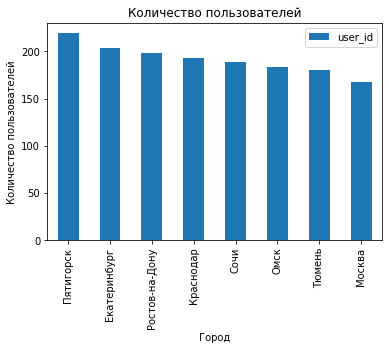

In [18]:
# частота встречаемости городов столбчатой диаграммой
ax = users_by_city.plot(kind='bar')
ax.set_title('Количество пользователей')
ax.set_xlabel('Город')
ax.set_ylabel('Количество пользователей')
plt.show()

*Количество пользователей в городах от 168 до 219. Наибольшее количество в Пятигорске, наименьшее в Москве*

**Анализ соотношения количества пользователей с подпиской и без**

In [19]:
# количество пользователей с подпиской и без таблицей
users_by_subscription = users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
users_by_subscription['sub_percentage'] = round(users_by_subscription['user_id'] / len(users) * 100, 2)
display(users_by_subscription)

,user_id,sub_percentage
subscription_type,,
free,835,54.43
ultra,699,45.57


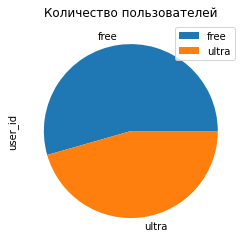

In [20]:
# количество пользователей с подпиской и без круговой диаграммой
ax = users_by_subscription.plot(kind='pie', y='user_id')
ax.set_title('Количество пользователей')
plt.show()

*Сервисом пользуется 835 пользователей без подписки (54%), 699 с подпиской (46%)*

**Анализ возраста пользователей**

In [21]:
# возраст пользователей табличный анализ
users_by_age = users.pivot_table(index='age', values='user_id', aggfunc='count')
users_by_age_sorted = users_by_age.sort_values(by='user_id', ascending=False)
users_by_age_sorted.head(5)

,user_id
age,
25,145
24,132
26,131
23,129
27,119


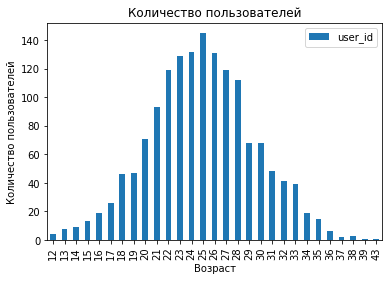

In [22]:
# возраст пользователей графически
ax = users_by_age.plot(kind='bar')
ax.set_title('Количество пользователей')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество пользователей')
plt.show()

*Возраст пользователей от 12 до 43 лет. Чаще всего встречаются значения возраста от 23 до 27 лет*

**Расстояние преодоленное пользователем**

In [23]:
# анализ расстояния за поездку
print('Максимальное расстояние за поездку', rides['distance'].max())
print('Минимальное расстояние за поездку', rides['distance'].min())
print('Медианное расстояние за поездку', rides['distance'].median())

Максимальное расстояние за поездку 7211.007744598519
Минимальное расстояние за поездку 0.855682925681208
Медианное расстояние за поездку 3133.6099936787664


In [24]:
# статистика по пройденному расстоянию за поездку
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

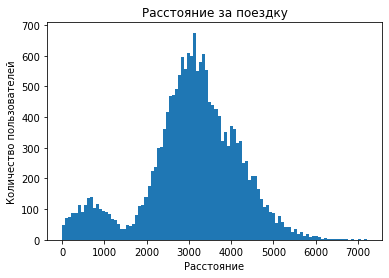

In [25]:
# расстояние преодоленное пользователем графически
ax = rides['distance'].plot(kind='hist', bins=100)
ax.set_title('Расстояние за поездку')
ax.set_xlabel('Расстояние')
ax.set_ylabel('Количество пользователей')
plt.show()

In [26]:
# рассмотрим небольшой пик количества пользователей от 0 до 1000 м
display(rides[rides['distance'] < 1000].describe())
display(rides[rides['distance'] > 1000].describe())

,user_id,distance,duration,month
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,977.518222,549.248484,9.555959,6.568513
std,386.254751,265.731473,3.823324,3.506851
min,1.000000,0.855683,2.035632,1.000000
25%,760.000000,333.796146,6.397153,3.000000
50%,1030.000000,574.118578,9.336174,7.000000
75%,1285.500000,771.980411,12.832299,10.000000
max,1534.000000,999.531884,18.235650,12.000000


,user_id,distance,duration,month
count,16696.000000,16696.000000,16696.000000,16696.000000
mean,831.805163,3277.857901,18.482880,6.480055
std,436.647865,882.395348,5.735661,3.431662
min,1.000000,1001.469328,0.500000,1.000000
25%,468.000000,2697.159003,14.403878,4.000000
50%,874.000000,3212.765595,18.251272,6.000000
75%,1206.000000,3852.326767,22.069973,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


*Наименьшее расстояние поездки 0.85 м, наибольшее 7211 м, в среднем пользователь проезжает 3133 м. Существует небольшой пик количества пользователей в районе 600 метров. Пользователь не отъезжает далеко от паркинга самокатов не далее 1 км, и катается с небольшой скоростью, судя по среднему времени, которое лишь в половину меньше чем при средней поездке на 3 км. Это можно объяснить поездками от одного паркинга самокатов до другого в качестве тестовой поездки для пользователей без подписки или заменой самоката по какой-либо причине.*

**Продолжительность поездок**

In [27]:
# анализ времени поездки
print('Максимальное время поездки', rides['duration'].max())
print('Минимальное время поездки', rides['duration'].min())
print('Медианное время поездки', rides['duration'].median())

Максимальное время поездки 40.82396261922424
Минимальное время поездки 0.5
Медианное время поездки 17.678394530393803


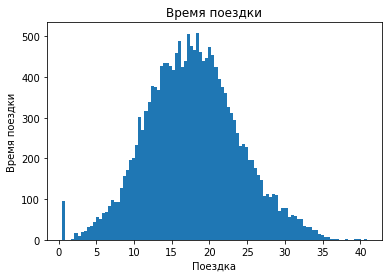

In [28]:
ax = rides['duration'].plot(kind='hist', bins=100)
ax.set_title('Время поездки')
ax.set_xlabel('Поездка')
ax.set_ylabel('Время поездки')
plt.show()

*Поездка занимает у пользователя от 0.5 минуты до 40 минут. В среднем поездка длится не более 18 минут.*

In [29]:
# анализ возможных выбросов по продолжительности поездки
print('Количество поездок меньше 1 минуты:',len(rides[rides['duration'] < 1]))
print('Средняя продолжительность поездок меньше 1 минуты:', rides[rides['duration'] < 1]['duration'].median())
print('Среднее расстояние поездок меньше 1 минуты:', rides[rides['duration'] < 1]['distance'].median())
print('Минимальное расстояние поездок меньше 1 минуты:', rides[rides['duration'] < 1]['distance'].min())

Количество поездок меньше 1 минуты: 95
Средняя продолжительность поездок меньше 1 минуты: 0.5
Среднее расстояние поездок меньше 1 минуты: 5052.769410992954
Минимальное расстояние поездок меньше 1 минуты: 4030.308008428866


In [30]:
# отбросим аномальные данные
print('Размер до преобразования:', len(rides))
rides = rides[rides['duration'] >= 1]
print('Размер после преобразования:', len(rides))

Размер до преобразования: 18068
Размер после преобразования: 17973


*Количество предполагаемых выбросов со значением продолжительности поездки меньше 1 минуты составляет 95, их продолжительность 30 секунд, медианное расстояние 5052 м, а минимальное 4030 м. Эти данные являются аномальными (самокат не может развить такую скорость, чтобы преодолеть более 4 км меньше чем за минуту), их количество не очень большое, поэтому можно отбросить эти данные. Скорее всего произошла техническая ошибка при определении расстояния или времени этих поездок*

#### Шаг 4. Объединение данных

In [31]:
# объединение наборов данных
data = rides.merge(users, on='user_id').merge(subscriptions, on='subscription_type')
data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [32]:
# проверка корректности объединения
print('Строк в наборе данных о поездках:', len(rides))
print('Строк в объединенном наборе данных:', len(data))
print('Корректное объединение' if len(data) == len(rides) else 'Некорректное объединение')

Строк в наборе данных о поездках: 17973
Строк в объединенном наборе данных: 17973
Корректное объединение


In [33]:
# выделение данных с подпиской
sub = data[data['subscription_type'] == 'ultra']
sub.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [34]:
# выделение данных без подписки
unsub = data[data['subscription_type'] == 'free']
unsub.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


**Визуализация данных**

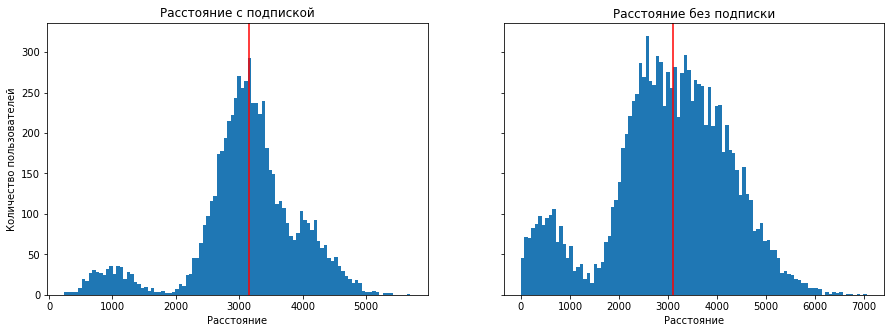

In [35]:
# визуализация данных о расстоянии поездок с подпиской и без
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax1.set_title('Расстояние с подпиской')
ax2.set_title('Расстояние без подписки')
ax1.set_xlabel('Расстояние')
ax2.set_xlabel('Расстояние')
ax1.set_ylabel('Количество пользователей')
ax1.hist(x=sub['distance'], bins=100)
ax2.hist(x=unsub['distance'], bins=100)
ax1.axvline(sub['distance'].median(), color='red')
ax2.axvline(unsub['distance'].median(), color='red')
plt.show()

In [36]:
# вывод данных по значениям на графике
print('Медианное расстояние с подпиской:', sub['distance'].median())
print('Медианное расстояние без подписки:', unsub['distance'].median())
print('Стандартное отклонение расстояния с подпиской:', sub['distance'].std())
print('Стандартное отклонение расстояния без подписки:', unsub['distance'].std())

Медианное расстояние с подпиской: 3148.6372291760854
Медианное расстояние без подписки: 3102.0830248287657
Стандартное отклонение расстояния с подпиской: 836.8953302010374
Стандартное отклонение расстояния без подписки: 1235.5410505450013


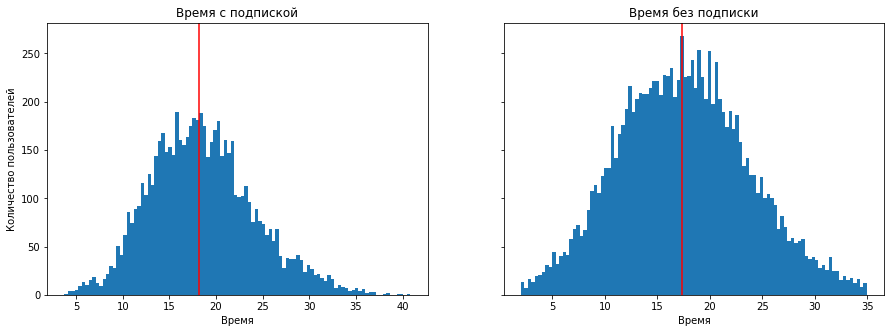

In [37]:
# визуализация данных о времени поездок с подпиской и без
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax1.set_title('Время с подпиской')
ax2.set_title('Время без подписки')
ax1.set_xlabel('Время')
ax2.set_xlabel('Время')
ax1.set_ylabel('Количество пользователей')
ax1.hist(x=sub['duration'], bins=100)
ax2.hist(x=unsub['duration'], bins=100)
ax1.axvline(sub['duration'].median(), color='red')
ax2.axvline(unsub['duration'].median(), color='red')
plt.show()

In [38]:
# вывод данных по значениям на графике
print('Медианное время с подпиской:', sub['duration'].median())
print('Медианное время без подписки:', unsub['duration'].median())
print('Стандартное отклонение времени с подпиской:', sub['duration'].std())
print('Стандартное отклонение времени без подписки:', unsub['duration'].std())

Медианное время с подпиской: 18.17815320055055
Медианное время без подписки: 17.383807372851628
Стандартное отклонение времени с подпиской: 5.572048329261366
Стандартное отклонение времени без подписки: 6.162608726726466


**Вывод по графикам анализа данных о пользователях с подпиской и без**

- Медианное расстояние у пользователей с подпиской и без более 3000 м, но у пользователей с подпиской оно немного выше чем у пользователей без подписки.

- У пользователей с подпиской и без подписки присутствует небольшой пик в количестве пользователей в районе 600 м поездки, но у пользователей без подписки этот пик значительно больше.

- Среди пользователей без подписки больше тех, кто преодолевает расстояния больше 6000 м.

- Пользователи с подпиской скорее всего пользуются самокатами каждый день для поездок по привычным маршрутам, поэтому разброс по дальности и длительности поездки меньше чем у пользователей без подписки.

- У пользователей с подпиской и без медианное время находится в районе 17, 18 минут, но у пользователей без подписки оно меньше.

- У пользователей без подписки нет тех, чья длительность поездки превышает 35 минут, в отличие от пользователей с подпиской, чья длительность поездки иногда достигает более 40 минут.

- С подпиской расстояние за поездку и её длительность незначительно увеличивается. Однако без подписки больше разброс в количестве пользователей как по времени, так и по расстоянию

## 4. Проверка гипотез

#### Шаг 5. Подсчёт выручки

In [39]:
# округление продолжительности поездки для подсчёта стоимости
data['duration'] = np.ceil(data['duration'])

# создание агрегированного набора данных по пользователям и месяцам
data_by_user = data.groupby(by=['user_id', 'month']).agg({
    'subscription_type' : 'first',
    'start_ride_price' : 'first',
    'minute_price' : 'first',
    'subscription_fee' : 'first',
    'distance' : 'sum',
    'user_id' : 'count',
    'duration' : 'sum',
})
data_by_user = data_by_user.rename(columns={'user_id' : 'count'})

# проверка результатов
data_by_user.head(15)

subscription_type  start_ride_price  minute_price  \
user_id month                                                     
1       1                 ultra                 0             6   
        4                 ultra                 0             6   
        8                 ultra                 0             6   
        10                ultra                 0             6   
        11                ultra                 0             6   
        12                ultra                 0             6   
2       3                 ultra                 0             6   
        4                 ultra                 0             6   
        6                 ultra                 0             6   
        7                 ultra                 0             6   
        8                 ultra                 0             6   
        10                ultra                 0             6   
        12                ultra                 0             6   
3       1                 ultra                 0             6   
        2                 ultra                 0             6   

               subscription_fee      distance  count  duration  
user_id month                                                   
1       1                   199   7027.511294      2      42.0  
        4                   199    754.159807      1       7.0  
        8                   199   6723.470560      2      46.0  
        10                  199   5809.911100      2      32.0  
        11                  199   7003.499363      3      56.0  
        12                  199   6751.629942      2      28.0  
2       3                   199  10187.723006      3      63.0  
        4                   199   6164.381824      2      40.0  
        6                   199   3255.338202      1      14.0  
        7                   199   6780.722964      2      48.0  
        8                   199    923.007439      1       7.0  
        10                  199   2824.636598      1      19.0  
        12                  199   3828.248580      1      12.0  
3       1                   199   3061.777147      1      13.0  
        2                   199   5421.152016      2      39.0

In [40]:
# функция для расчёта выручки за месяц
def rev_count(row):
    return row['start_ride_price'] * row['count'] + row['minute_price'] * row['duration'] + row['subscription_fee']

In [41]:
# добавление столбца с выручкой по месяцам
data_by_user['revenue'] = data_by_user.apply(rev_count, axis=1)
data_by_user.head(15)

subscription_type  start_ride_price  minute_price  \
user_id month                                                     
1       1                 ultra                 0             6   
        4                 ultra                 0             6   
        8                 ultra                 0             6   
        10                ultra                 0             6   
        11                ultra                 0             6   
        12                ultra                 0             6   
2       3                 ultra                 0             6   
        4                 ultra                 0             6   
        6                 ultra                 0             6   
        7                 ultra                 0             6   
        8                 ultra                 0             6   
        10                ultra                 0             6   
        12                ultra                 0             6   
3       1                 ultra                 0             6   
        2                 ultra                 0             6   

               subscription_fee      distance  count  duration  revenue  
user_id month                                                            
1       1                   199   7027.511294      2      42.0    451.0  
        4                   199    754.159807      1       7.0    241.0  
        8                   199   6723.470560      2      46.0    475.0  
        10                  199   5809.911100      2      32.0    391.0  
        11                  199   7003.499363      3      56.0    535.0  
        12                  199   6751.629942      2      28.0    367.0  
2       3                   199  10187.723006      3      63.0    577.0  
        4                   199   6164.381824      2      40.0    439.0  
        6                   199   3255.338202      1      14.0    283.0  
        7                   199   6780.722964      2      48.0    487.0  
        8                   199    923.007439      1       7.0    241.0  
        10                  199   2824.636598      1      19.0    313.0  
        12                  199   3828.248580      1      12.0    271.0  
3       1                   199   3061.777147      1      13.0    277.0  
        2                   199   5421.152016      2      39.0    433.0

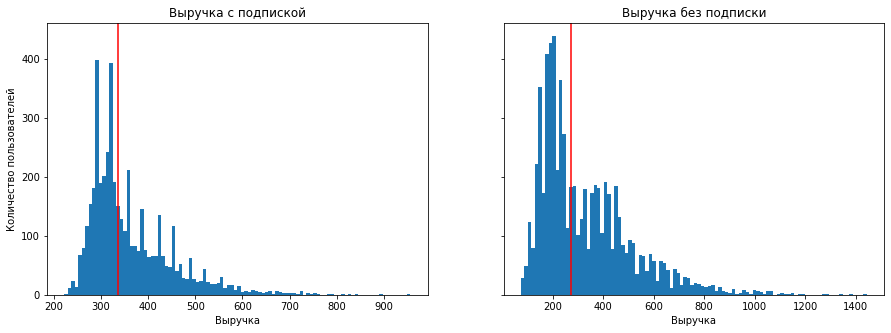

In [42]:
# Визуализация выручки для пользователей с подпиской и без
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax1.set_title('Выручка с подпиской')
ax2.set_title('Выручка без подписки')
ax1.set_xlabel('Выручка')
ax2.set_xlabel('Выручка')
ax1.set_ylabel('Количество пользователей')
ax1.hist(x=data_by_user[data_by_user['subscription_type'] == 'ultra']['revenue'], bins=100)
ax2.hist(x=data_by_user[data_by_user['subscription_type'] == 'free']['revenue'], bins=100)
ax1.axvline(data_by_user[data_by_user['subscription_type'] == 'ultra']['revenue'].median(), color='red')
ax2.axvline(data_by_user[data_by_user['subscription_type'] == 'free']['revenue'].median(), color='red')
plt.show()

In [43]:
# получение медианы по выручке с подпиской и без
print('Медианная выручка с подпиской', data_by_user[data_by_user['subscription_type'] == 'ultra']['revenue'].median())
print('Медианная выручка без подписки', data_by_user[data_by_user['subscription_type'] == 'free']['revenue'].median())

Медианная выручка с подпиской 337.0
Медианная выручка без подписки 274.0


*Получили данные по выручке от каждого пользователя по месяцам. Можно сказать, что медианная выручка с подпиской выше. Значит можно предположить, что для расширения бизнеса следует увеличивать количество пользователей с подпиской.*

#### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проведем статистический тест о равенстве средних значений выборок времени поездки с подпиской и без:

H0 - среднее время с подпиской равно среднему времени без подписки

H1 - среднее время с подпиской больше среднего времени без подписки

уровень статистической значимости примем 0.05

In [44]:
# оценим параметры двух выборок, чтобы определить, можем ли мы применить статистический тест с определенными параметрами
d1 = sub['duration'].std()**2
d2 = unsub['duration'].std()**2

print('Размер выборки с подпиской:',len( sub['duration']), 'дисперсия:', d1)
print('Размер выборки без подписки:', len(unsub['duration']), 'дисперсия:', d2)

Размер выборки с подпиской: 6500 дисперсия: 31.047722583624385
Размер выборки без подписки: 11473 дисперсия: 37.977746318725195


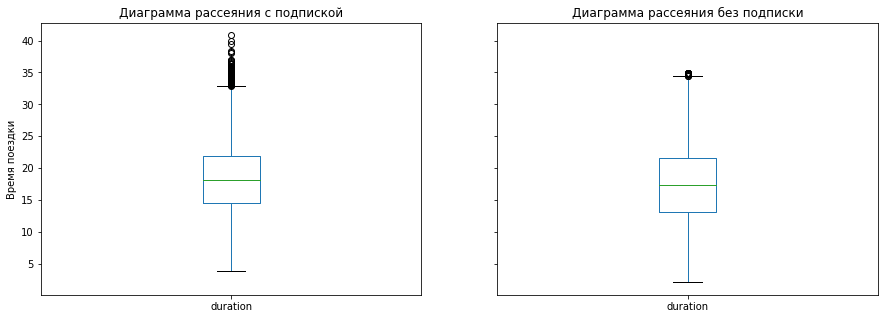

In [45]:
# построим диаграмму размаха для оценки возможности использования параметра equal_var
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax1.set_title('Диаграмма рассеяния с подпиской')
ax2.set_title('Диаграмма рассеяния без подписки')
ax1.set_ylabel('Время поездки')
sub['duration'].plot(ax=ax1, kind='box')
unsub['duration'].plot(ax=ax2, kind='box')
plt.show()

*Судя по графику можно принять дисперсии двух выборок равными для тестов. Проведем дополнительный тест*

Проведем F тест на равенство дисперсий с уровнем статистической значимости 0.05.

H 0 : Дисперсия среди каждой группы равна.

H 1 : Дисперсии не равны.

In [46]:
# функция для f-test
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1)
    dfn = x.size-1
    dfd = y.size-1
    p = 1-st.f.cdf(f, dfn, dfd)
    return f, p

In [47]:
# выполним f-test
results = f_test(sub['duration'], unsub['duration'])

if results[1] < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


*Можем использовать статистический тест данных о длительности поездок для двух независимых выборок с подпиской и без.*

In [48]:
# задаем уровень статистической значимости
alpha = 0.05

# проводим тест
results = st.ttest_ind(sub['duration'], unsub['duration'], equal_var=True, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.704468074453899e-28
Отвергаем нулевую гипотезу


*Можем отвергнуть гипотезу о равенстве среднего времени с подпиской и без. Имеем основания, чтобы предпологать, что люди с подпиской тратят больше времени на поездки.*

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Проведем статистический тест о равенстве среднего расстояния поездки с подпиской 3130 метрам:

H0 - среднее расстояние с подпиской равно 3130 м

H1 - среднее расстояние с подпиской превышает 3130 м

уровень статистической значимости примем 0.05

In [49]:
# задаем уровень статистической значимости
alpha = 0.05

# проводим тест
results = st.ttest_1samp(sub['distance'], 3130, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


*Не получилось отвергнуть нулевую гипотезу. С большой долей уверенности можем предположить справедливость гипотезы о том, что среднее расстояние равно 3130 м.*

6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Проведем статистический тест о равенстве средней выручки с подпиской и без по месяцам:

H0 - средние выручки по месяцам равны

H1 - средняя выручка по месяцам с подпиской ниже

уровень статистической значимости примем 0.05

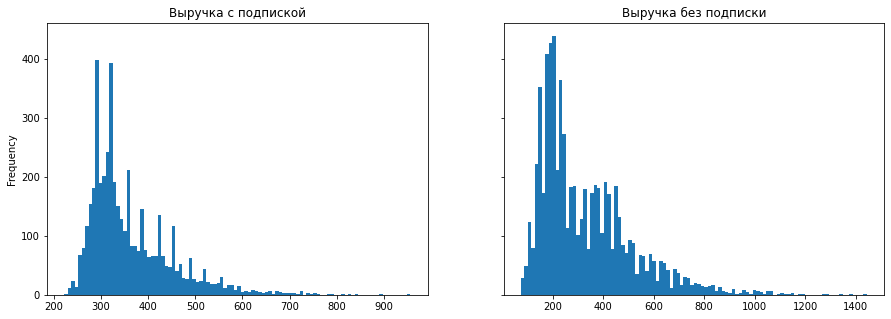

In [50]:
# получим 2 набора данных со значениями выручки с подпиской и без по месяцам
sub_by_month = data_by_user[data_by_user['subscription_type'] == 'ultra']
unsub_by_month = data_by_user[data_by_user['subscription_type'] == 'free']

# изобразим результат графически
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax1.set_title('Выручка с подпиской')
ax2.set_title('Выручка без подписки')
ax1.set_ylabel('Выручка')
sub_by_month['revenue'].plot(ax=ax1, kind='hist', bins=100)
unsub_by_month['revenue'].plot(ax=ax2, kind='hist', bins=100)
plt.show()

In [51]:
# задаем уровень статистической значимости
alpha = 0.05

# проводим тест
results = st.ttest_ind(sub_by_month['revenue'], unsub_by_month['revenue'], equal_var=True, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


*Отвергаем нулевую гипотезу. С большой долей уверенности можем предположить, что выручка с подпиской по месяцам выше чем без.*

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

*Для проверки этой гипотезы понадобится статистический тест для двух зависимых выборок scipy.stat.ttest_rel(). В аргументы метода при вызове нужно будет передать сначала список значений по количеству обращений до, а затем список значений по количеству обращений после изменений в выборке, указать альтернативную гипотезу alternative='greater', так как проверяем гипотезу о том, что число обращений снизилось (в начальной выборке значения должны быть больше).*

#### Шаг 7. Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [52]:
# функция для проверки вероятности биномиального распределения
def pcheck(n, p, plan):    
    # апроксимируем биномиальное распределение нормальным
    mu = n * p
    sigma = sqrt(n * p * (1 - p))
    norm = st.norm(mu, sigma)

    # проверка вероятности выполнить план
    res = norm.cdf(plan)
    return res

In [53]:
# зададим начальные параметры и условия
p = 0.1
n = 2000
plan = 100

# будем уменьшать значение в 2000 промокодов пока вероятность не опустится до необходимого уровня 0.05
while pcheck(n, p, plan) < 0.05:
    #print(pcheck(n))
    n -= 1
    
# выведем финальное значение n
print(f'Для выполнени плана с вероятностью 0.05 необходимо выдать {n} промокодов')

Для выполнени плана с вероятностью 0.05 необходимо выдать 1168 промокодов


/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


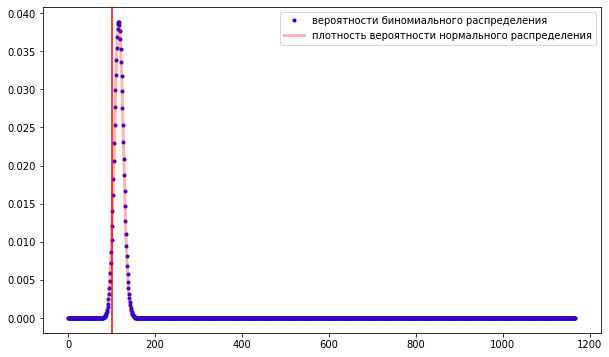

Условие апроксимации выполняется


In [54]:
# построим график апроксимации и отобразим на нём значение в 100 подписок
# параметры биномиального распределения
n = 1168
p = 0.1
 
# зададим числовой промежуток
x = list(range(n))
# график биномиального распределения
fig, ax = plt.subplots(figsize=(10, 6))
# используем синие о-образные маркеры 
ax.plot(x, st.binom.pmf(x, n, p), 'bo', ms=3, label='вероятности биномиального распределения')

# апроксимация нормальным распределением
mu = n * p
sigma = sqrt(n * p * (1 - p))

# используем красную линию
ax.plot(x, st.norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')

# проведем вертикальную линию в 100 продлений подписок
ax.axvline(100, color='red')

# выводим график
ax.legend(loc='best')
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие апроксимации выполняется')
else:
    print('Условие апроксимации не выполняется')

*Апроксимация биномиального распределения нормальным выполняется по правилу 3 сигм. Для выполнения плана по 100 продлениям подписок сервиса, необходимо выдать 1168 промокодов.*

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [55]:
# параметры биноминального распределения и условие
n = 1000000
p = 0.4
plan = 399500

# используем функцию проверки вероятности распределения
res = pcheck(n, p, plan)

# выведем результат
print(f'Вероятность, что уведомление откроют не более 399500 пользователей:', res)

Вероятность, что уведомление откроют не более 399500 пользователей: 0.15371708296369768


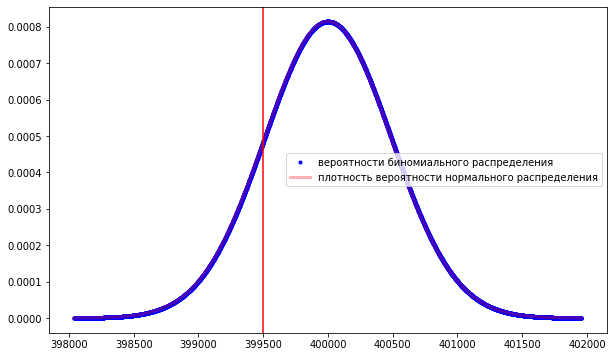

Условие апроксимации выполняется


In [56]:
# построим график апроксимации и отобразим на нём значение в 100 подписок
# параметры биномиального распределения
n = 1000000
p = 0.4
 
# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# график биномиального распределения
fig, ax = plt.subplots(figsize=(10, 6))
# используем синие о-образные маркеры 
ax.plot(x, st.binom.pmf(x, n, p), 'bo', ms=3, label='вероятности биномиального распределения')

# апроксимация нормальным распределением
mu = n * p
sigma = sqrt(n * p * (1 - p))

# используем красную линию
ax.plot(x, st.norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')

# проведем вертикальную линию в 399500 открытий уведомления
ax.axvline(399500, color='red')

# выводим график
ax.legend(loc='best')
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие апроксимации выполняется')
else:
    print('Условие апроксимации не выполняется')

*Правило 3 сигм для апроксимации выполняется. Вероятность, что уведомление откроют не более 399500 пользователей: 0.15*

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Задачи по распределениям выполнены верно.
</div>

## 6. Выводы

        В ходе выполнения задания была проведена предобработка данных. Из данных о пользователях удалено небольшое количество дубликатов, в наборе данных о поездках изменен тип содержимого столбца для работы с датой. Добавлен столбец с информацией о месяце поездки.
        В ходе исследовательского анализа данных обнаружено, что количество пользователей в городах от 168 до 219. Наибольшее количество в Пятигорске, наименьшее в Москве. Сервисом пользуется 835 пользователей без подписки (54%), 699 с подпиской (46%). Возраст пользователей от 12 до 43 лет. Чаще всего встречаются значения возраста от 23 до 27 лет. Наименьшее расстояние поездки 0.85 м, наибольшее 7211 м, в среднем пользователь проезжает 3133 м. Поездка занимает у пользователя от 0.5 минуты до 40 минут. В среднем поездка длится не более 18 минут. С подпиской расстояние за поездку и её длительность незначительно увеличивается. Однако без подписки больше разброс в количестве пользователей как по времени, так и по расстоянию.
        Была подсчитана выручка для каждого пользователя по месяцам, и проверены гипотезы о влиянии наличия подписки на выручку сервиса. Можно сказать, что медианная выручка по месяцам с подпиской выше. Значит можно предположить, что для расширения бизнеса следует увеличивать количество пользователей с подпиской. Можем отвергнуть гипотезу о равенстве среднего времени с подпиской и без. Имеем основания, чтобы предпологать, что люди с подпиской тратят больше времени на поездки. Не можем отвергнуть гипотезу о том, что среднее расстояние равно 3130 м. С большой долей уверенности можем предположить, что выручка с подпиской по месяцам выше чем без.
        Также были проверены гипотезы отдела маркетинга. Для выполнения плана по 100 продлениям подписок сервиса с 0.05 вероятностью, необходимо выдать 1168 промокодов. При рассылке 100000 уведомлений, вероятность, что его откроют не более 399500 пользователей 0.15.

## 7. Рекомендации заказчику

        Для расширения бизнеса по проведенному анализу, можно однозначно рекомендовать разработку стратегий по увеличению числа клиентов с подпиской. Такие клиенты тратят больше времени на поездки, и выручка по месяцам для таких клиентов выше. Среднее расстояние, проезжаемое клиентами, оптимально по износу самоката. Предлагаем рассмотреть варианты с увеличением срока службы самокатов (замена колес, амортизаторов, аккумуляторов), в будущем покупать самокаты с большим ресурсом и высокой ремонтопригодностью.